In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [11]:
a = cv2.imread(r"C:\Users\ch.en.u4aie22062\Downloads\22062 NLP\22062 CV\SkinColor\FacePhoto\Megan-Fox-Pretty-Face-1-1024x768.jpg")
a = cv2.cvtColor(a,cv2.COLOR_BGR2RGB)
b = cv2.imread(r"C:\Users\ch.en.u4aie22062\Downloads\22062 NLP\22062 CV\SkinColor\GroundT_FacePhoto\Megan-Fox-Pretty-Face-1-1024x768.png")
b = cv2.cvtColor(b,cv2.COLOR_BGR2RGB)
c = cv2.imread(r"C:\Users\ch.en.u4aie22062\Downloads\22062 NLP\22062 CV\SkinColor\FacePhoto\Megan-Fox-Pretty-Face-1-1024x768.jpg")
d = cv2.imread(r"C:\Users\ch.en.u4aie22062\Downloads\22062 NLP\22062 CV\SkinColor\GroundT_FacePhoto\Megan-Fox-Pretty-Face-1-1024x768.png")

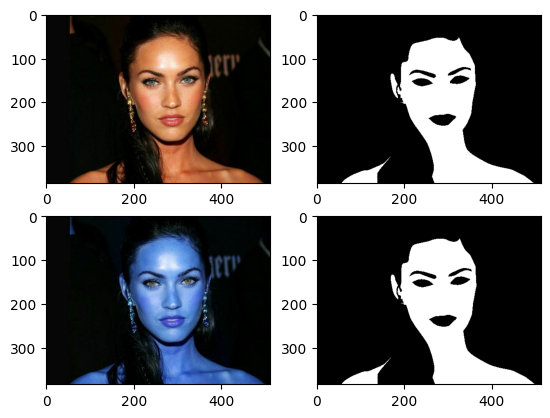

In [12]:
plt.subplot(221)
plt.imshow(a)
plt.subplot(222)
plt.imshow(b)
plt.subplot(223)
plt.imshow(c)
plt.subplot(224)
plt.imshow(d)

In [14]:
skincolors = a[b[:,:,0]==255]
print(skincolors.shape)

(45812, 3)


In [15]:
nonskincolors = a[b[:,:,0]==0]
print(nonskincolors.shape)

(150796, 3)


In [17]:
color = np.vstack((skincolors, nonskincolors))
target = np.concatenate((np.ones(len(skincolors)),np.zeros(len(nonskincolors))))

In [18]:
from sklearn.linear_model import LogisticRegressionCV
learn_color = color[1::2]
test_color = color[0::2]
learn_target = target[1::2]
test_target = target[0::2]
logregr = LogisticRegressionCV()
logregr.fit(learn_color, learn_target)

LogisticRegressionCV()

In [19]:
logregr.score(test_color, test_target)

0.9658915201822916

<function matplotlib.pyplot.show(close=None, block=None)>

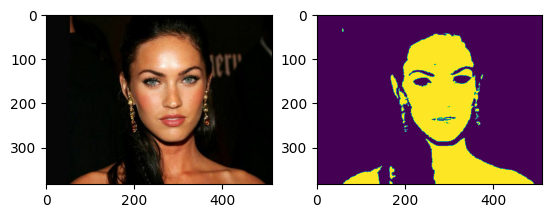

In [20]:
image_colors = a.reshape((-1,3))
predict_skin = logregr.predict(image_colors).reshape(a.shape[:2])
plt.subplot(121)
plt.imshow(a)
plt.subplot(122)
plt.imshow(predict_skin)
plt.show